[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/tyson-swetnam/agic-2022/blob/main/docs/notebooks/xarray.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://tyson-swetnam.github.io/agic-2022/notebooks/xarray/)
<a href="https://de.cyverse.org/apps/de/cc77b788-bc45-11eb-9934-008cfa5ae621/launch" target="_blank"><img src="https://img.shields.io/badge/Datascience-latest-orange?style=plastic&logo=jupyter"></a>

## Xarray example Jupyter Notebook

In [1]:
# to run this cell uncomment the line below by removing the # 
#!conda install -c conda-forge xarray==0.20.2 dask netCDF4 bottleneck pooch

## Xarray instalation
Install Xarray and some of its dependencies if not already installed.

``` conda install -c conda-forge xarray==0.20.2 dask netCDF4 bottleneck pooch```

It may take a while resolving installation environments.
If it is successful, will install other package dependecies.

Xarray comes with a collection of datasets to explore: [xarray.tutorial.open_dataset](https://docs.xarray.dev/en/stable/generated/xarray.tutorial.open_dataset.html)

Available datasets:

`"air_temperature"`: NCEP reanalysis subset

`"air_temperature_gradient"`: NCEP reanalysis subset with approximate x,y gradients

`"basin_mask"`: Dataset with ocean basins marked using integers

`"ASE_ice_velocity"`: MEaSUREs InSAR-Based Ice Velocity of the Amundsen Sea Embayment, Antarctica, Version 1

`"rasm"`: Output of the Regional Arctic System Model (RASM)

`"ROMS_example"`: Regional Ocean Model System (ROMS) output

`"tiny"`: small synthetic dataset with a 1D data variable

`"era5-2mt-2019-03-uk.grib"`: ERA5 temperature data over the UK

`"eraint_uvz"`: data from ERA-Interim reanalysis, monthly averages of upper level data

`"ersstv5"`: NOAA’s Extended Reconstructed Sea Surface Temperature monthly averages


In [1]:
# Load required libraries

%matplotlib inline

import numpy as np
import pandas as pd
import dask.array as da
import dask.dataframe as dd
import pooch
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,5)


In [2]:
# Load the air_temperature dataset and define a xarray datastructure
# 4 x Daily Air temperature in degrees K at sigma level 995 
# (2013-01-01 to 2014-12-31)
# Spatial Coverage
# 2.5 degree x 2.5 degree global grids (144x73) [2.5 degree = 172.5 miles]
# 0.0E to 357.5E, 90.0N to 90.0S

ds = xr.tutorial.open_dataset('air_temperature')
#ds.info()


In [3]:
# Show the components of the xarray.Dataset
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [ ]:
# Show the values of  data variable: air
ds.air

In [ ]:
# Direct access to values
#ds.air.values

In [ ]:
# Underneath is a Numpy N dimensional Array
type(ds.air.values)

### DataArray Properties

In [ ]:
# Show dimensions
ds.dims

In [ ]:
# Show coordinates
ds.coords

In [ ]:
# Show attributes
ds.attrs

We can use [xarray.DataArray.groupby](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.groupby.html) to caculate average monthly temperatures and anomalies.

In [4]:

# calculate monthly climatology
climatology = ds.groupby('time.month').mean('time')

# calculate anomalies 
anomalies = ds.groupby('time.month') - climatology


In [5]:
# Show the resulting Dataset
climatology

<xarray.Dataset>
Dimensions:  (lat: 25, month: 12, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 246.3 246.4 246.2 ... 297.6 297.6 297.5

In [ ]:
# Show the sesulting Dataset
anomalies


Much like in Pandas, Xarray includes an interface to Matplotlib that we can access through the `.plot()` method of every DataArray.

Plotting the air temperature for the first time value, using longitude as the x variable.

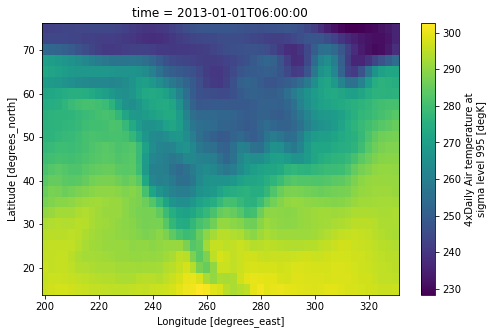

In [6]:
ds.air.isel(time=1).plot(x="lon");

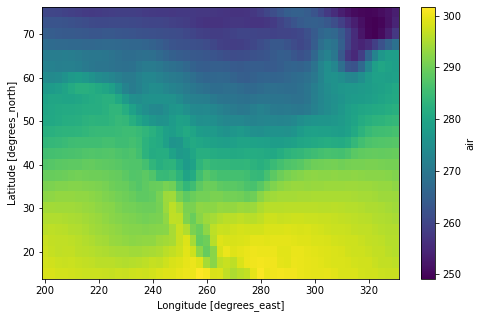

In [7]:
# We can take time average of air temperature over all coordinates 
ds.air.mean("time").plot(x="lon");

## Indexing and selecting data

### Positional indexing


In [8]:
# Create the following Dataset 

da = xr.DataArray(
     np.random.rand(4, 3),
     [
         ("time", pd.date_range("2000-01-01", periods=4)),
         ("space", ["IA", "IL", "IN"]),
     ],
   )
# Show the Dataset
da

<xarray.DataArray (time: 4, space: 3)>
array([[0.17633122, 0.59377299, 0.30699365],
       [0.4243673 , 0.90601059, 0.2009795 ],
       [0.37157228, 0.28094102, 0.56942557],
       [0.60069197, 0.88338457, 0.07061534]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [10]:
# Show Dataset dimensions
da.dims

('time', 'space')

In [9]:
# Select the first 2 values of first variable (time)
da[:2]

<xarray.DataArray (time: 2, space: 3)>
array([[0.17633122, 0.59377299, 0.30699365],
       [0.4243673 , 0.90601059, 0.2009795 ]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02
  * space    (space) <U2 'IA' 'IL' 'IN'

In [11]:
# Select the first values of (time, space)
da[0,0]

<xarray.DataArray ()>
array(0.17633122)
Coordinates:
    time     datetime64[ns] 2000-01-01
    space    <U2 'IA'

In [12]:
# get all the values of the `time` variable and 
# select the third and second values of the `space` variable in that order.
da[:, [2, 1]]

<xarray.DataArray (time: 4, space: 2)>
array([[0.30699365, 0.59377299],
       [0.2009795 , 0.90601059],
       [0.56942557, 0.28094102],
       [0.07061534, 0.88338457]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IN' 'IL'

### Indexing with dimension names

In [13]:
# index by integer array indices
# Select by index the first space variable and first 2 values of time
da.isel(space=0, time=slice(None, 2))

<xarray.DataArray (time: 2)>
array([0.17633122, 0.4243673 ])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02
    space    <U2 'IA'

In [14]:
# index by dimension coordinate labels
da.sel(time=slice("2000-01-01", "2000-01-02"))


<xarray.DataArray (time: 2, space: 3)>
array([[0.17633122, 0.59377299, 0.30699365],
       [0.4243673 , 0.90601059, 0.2009795 ]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02
  * space    (space) <U2 'IA' 'IL' 'IN'

In [15]:
# Same as: da[0,0], but using indexes
da.isel(space=[0], time=[0])

<xarray.DataArray (time: 1, space: 1)>
array([[0.17633122]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01
  * space    (space) <U2 'IA'

In [16]:
# Select a specific time slice
da.sel(time="2000-01-01")

<xarray.DataArray (space: 3)>
array([0.17633122, 0.59377299, 0.30699365])
Coordinates:
    time     datetime64[ns] 2000-01-01
  * space    (space) <U2 'IA' 'IL' 'IN'

### Droping labels and dimensions
The `drop_sel()` method returns a new object with the listed index labels along a dimension dropped:

In [17]:
da

<xarray.DataArray (time: 4, space: 3)>
array([[0.17633122, 0.59377299, 0.30699365],
       [0.4243673 , 0.90601059, 0.2009795 ],
       [0.37157228, 0.28094102, 0.56942557],
       [0.60069197, 0.88338457, 0.07061534]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [18]:
# Drop 2 space coordinates using labels
da.drop_sel(space=["IN", "IL"])

<xarray.DataArray (time: 4, space: 1)>
array([[0.17633122],
       [0.4243673 ],
       [0.37157228],
       [0.60069197]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA'

In [19]:
# Drop by index the first values of space and time variables
da.drop_isel(space=[0], time=[0])

<xarray.DataArray (time: 3, space: 2)>
array([[0.90601059, 0.2009795 ],
       [0.28094102, 0.56942557],
       [0.88338457, 0.07061534]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IL' 'IN'

Use drop_vars() to drop a full variable from a Dataset. Any variables depending on it are also dropped:

In [20]:
# Drop the time coordinate variable reference
da.drop_vars("time")

<xarray.DataArray (time: 4, space: 3)>
array([[0.17633122, 0.59377299, 0.30699365],
       [0.4243673 , 0.90601059, 0.2009795 ],
       [0.37157228, 0.28094102, 0.56942557],
       [0.60069197, 0.88338457, 0.07061534]])
Coordinates:
  * space    (space) <U2 'IA' 'IL' 'IN'
Dimensions without coordinates: time

## Example of reading a netCDF file using Xarray

We will read an [Argo](https://argo.ucsd.edu/about/) data file that describes the temperature and salinity of the water and some of the floats measure other properties that describe the biology/chemistry of the ocean. 

The Argo robot instruments drift along the ocean and collect data which are stored in netCDF format and can be [acccessed via HTTP and FTP](https://argo.ucsd.edu/data/data-from-gdacs/).

Fot this example, we download the file: [nodc_4901112_prof.nc](https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/meds/4901112/)

In [ ]:
import numpy as np
import xarray as xr

from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)


In [21]:
# Reading an Argo dataset using Xarray
argo_data = xr.open_dataset('data/nodc_4901112_prof.nc')

# Show file keys
argo_data.keys()


KeysView(<xarray.Dataset>
Dimensions:                       (n_prof: 163, n_param: 3, n_levels: 72, n_calib: 1, n_history: 0)
Dimensions without coordinates: n_prof, n_param, n_levels, n_calib, n_history
Data variables: (12/65)
    data_type                     object ...
    format_version                object ...
    handbook_version              object ...
    reference_date_time           object ...
    date_creation                 object ...
    date_update                   object ...
    ...                            ...
    history_parameter             (n_history, n_prof) object ...
    history_start_pres            (n_history, n_prof) float32 ...
    history_stop_pres             (n_history, n_prof) float32 ...
    history_previous_value        (n_history, n_prof) float32 ...
    history_qctest                (n_history, n_prof) object ...
    crs                           int32 ...
Attributes: (12/49)
    title:                           Argo float vertical profile
    in

In [22]:
# Show dataset structure
argo_data

<xarray.Dataset>
Dimensions:                       (n_prof: 163, n_param: 3, n_levels: 72, n_calib: 1, n_history: 0)
Dimensions without coordinates: n_prof, n_param, n_levels, n_calib, n_history
Data variables: (12/65)
    data_type                     object ...
    format_version                object ...
    handbook_version              object ...
    reference_date_time           object ...
    date_creation                 object ...
    date_update                   object ...
    ...                            ...
    history_parameter             (n_history, n_prof) object ...
    history_start_pres            (n_history, n_prof) float32 ...
    history_stop_pres             (n_history, n_prof) float32 ...
    history_previous_value        (n_history, n_prof) float32 ...
    history_qctest                (n_history, n_prof) object ...
    crs                           int32 ...
Attributes: (12/49)
    title:                           Argo float vertical profile
    institution:                     FR GDAC
    source:                          Argo float
    history:                         2019-10-20T10:17:46Z boyer convAGDAC.f90...
    references:                      https://www.nodc.noaa.gov/argo/
    user_manual_version:             3.1
    ...                              ...
    time_coverage_end:               2015-01-11T22:56:00Z
    time_coverage_duration:          point
    time_coverage_resolution:        point
    gadr_ConventionVersion:          GADR-3.0
    gadr_program:                    convAGDAC.f90
    gadr_programVersion:             1.2

In [23]:
# Show dataset variables
argo_data.dims

Frozen({'n_prof': 163, 'n_param': 3, 'n_levels': 72, 'n_calib': 1, 'n_history': 0})

In [24]:
# Disctionary of attributes
argo_data.attrs

{'title': 'Argo float vertical profile',
 'institution': 'FR GDAC',
 'source': 'Argo float',
 'history': '2019-10-20T10:17:46Z boyer convAGDAC.f90 Version 1.2',
 'references': 'https://www.nodc.noaa.gov/argo/',
 'user_manual_version': '3.1',
 'Conventions': 'GADR-3.0 Argo-3.0 CF-1.6',
 'featureType': 'trajectoryProfile',
 'uuid': '8f9d03e4-cee0-41e1-a7be-cbdd96c7b859',
 'summary': 'The U.S. National Centers for Environmental Information (NCEI) operates the Argo Global Data Repository (GADR). For information about organizations contributing data to GADR, see https://www.nodc.noaa.gov/argo/',
 'file_source': 'The Argo Global Data Assembly Center FTP server at ftp://ftp.ifremer.fr/ifremer/argo',
 'keywords': 'temperature, salinity, sea_water_temperature, sea_water_salinity',
 'keywords_vocabulary': 'NCEI Data Types, CF Standard Names',
 'creator_name': 'Charles Sun',
 'creator_url': 'https://www.nodc.noaa.gov',
 'creator_email': 'Charles.Sun@noaa.gov',
 'id': '0173560',
 'naming_authority

In [26]:
# Show first n=5 rows of temperature values
argo_data.temp_adjusted.head()

<xarray.DataArray 'temp_adjusted' (n_prof: 5, n_levels: 5)>
array([[13.237, 13.102, 12.747, 10.805,  9.631],
       [14.183, 14.107, 13.924, 12.084, 11.191],
       [13.845, 13.796, 13.748, 13.25 ,  9.889],
       [13.567, 13.561, 13.525, 13.223, 10.316],
       [11.334, 10.086,  9.03 ,  9.08 ,  8.094]], dtype=float32)
Dimensions without coordinates: n_prof, n_levels
Attributes:
    long_name:       Sea temperature in-situ ITS-90 scale
    standard_name:   sea_water_temperature
    units:           degree_Celsius
    valid_min:       -2.5
    valid_max:       40.0
    C_format:        %9.3f
    FORTRAN_format:  F9.3
    resolution:      0.001

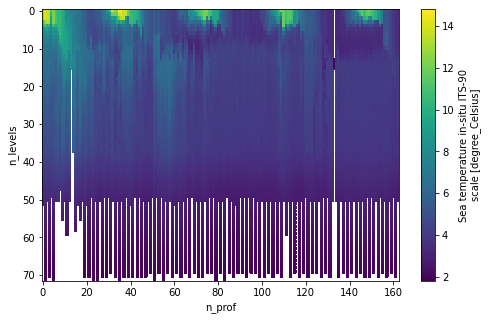

In [27]:
# Quick Timeseries Profile plot of Temperature
argo_data.temp_adjusted.T.plot()
plt.gca().invert_yaxis()


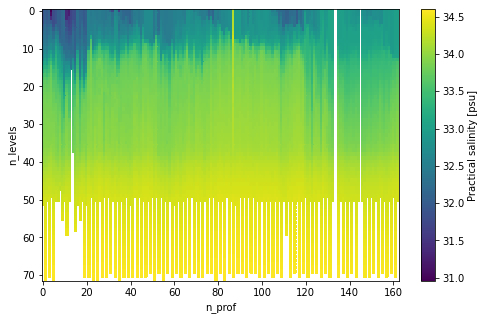

In [28]:
# Quick Timeseries Profile plot of Salinity
argo_data.psal_adjusted.T.plot()
plt.gca().invert_yaxis()


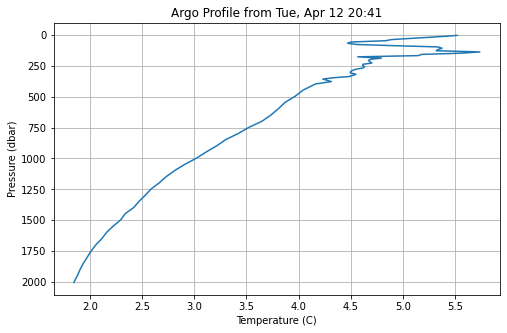

In [29]:
# Profile Plot
nprof = 25 #Specify a profile to plot
plt.plot(argo_data.temp_adjusted[nprof], argo_data.pres_adjusted[nprof])

plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (dbar)')
plt.title('Argo Profile from %s' % argo_data.juld[nprof].dt.strftime('%a, %b %d %H:%M').values)
plt.grid()

plt.gca().invert_yaxis() #Flip the y-axis


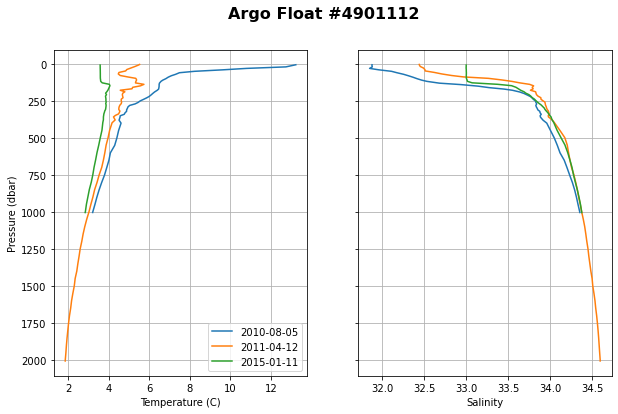

In [30]:
# Profile Plot

data = argo_data.copy()

# Subplot example
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

nprof = 0 # Fist profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

nprof = 25 # Middle-ish profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

nprof = -1 # Last profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Temperature (C)')
ax2.set_xlabel('Salinity')
ax1.invert_yaxis()
ax1.legend()

# Add some gridlines
ax1.grid()
ax2.grid()

# Add a super title
fig.suptitle('Argo Float #%d' % data.platform_number[nprof].values, fontweight='bold', fontsize=16);


## Temperature Salinity Diagram

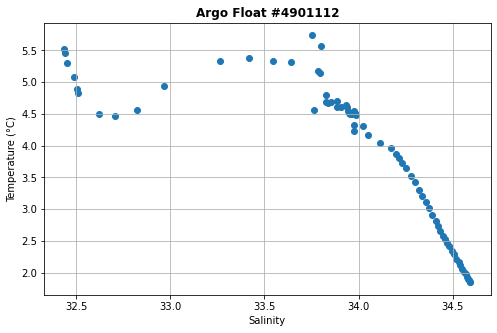

In [31]:
# TS Diagram
nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof])
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.title('Argo Float #%d' % data.platform_number[nprof].values, fontweight='bold');


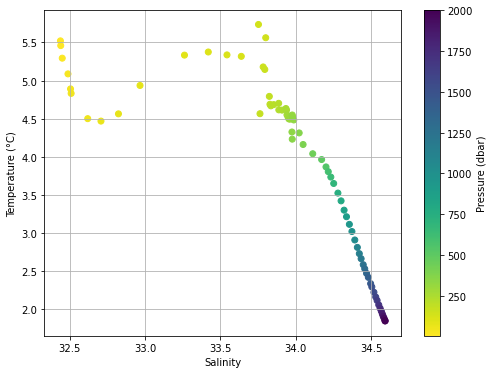

In [32]:
# We can also use a colored scatterplot to show the depth dimension.
# T-S Diagram with depth
plt.figure(figsize=(8,6))

nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')
plt.grid()

cbh = plt.colorbar();
cbh.set_label('Pressure (dbar)')


To calculate density, we will need the wonderful `seawater` library.

To install it:

Use: `!pip install seawater`

Or in Anaconda use: `conda install -c conda-forge seawater`

In [34]:
import seawater


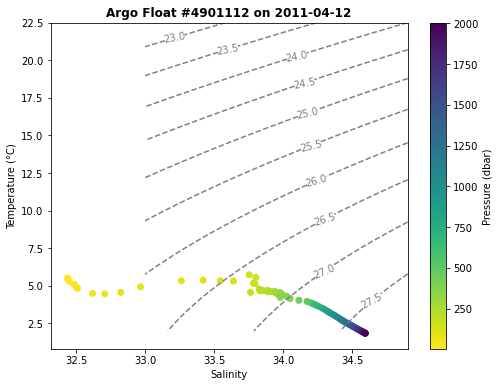

In [35]:
# TS Diagram with density contours
plt.figure(figsize=(8,6))

# Calculate the density lines
x = np.arange(33, 35, .1)
y = np.arange(2, 23, .5)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.5))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

# Plot the data
nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')
plt.title('Argo Float #%d on %s' % (data.platform_number[nprof].values, data.juld[nprof].dt.strftime('%Y-%m-%d').values), fontweight='bold');

# Add a colorbar
cbh = plt.colorbar(label='Pressure (dbar)');


## Float Track Map

<ipython-input-39-21828319d8df>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));


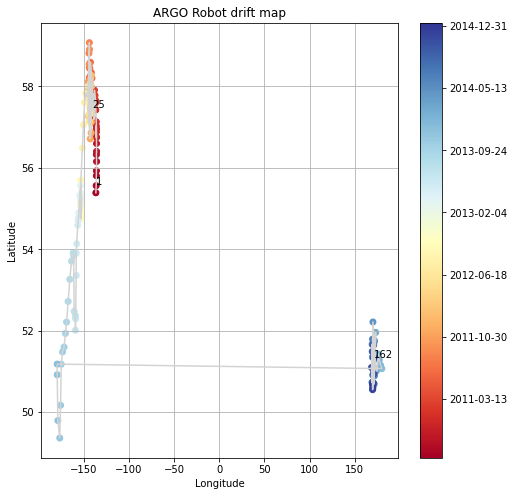

In [39]:
# Simple map of a float track
plt.figure(figsize=(8,8))
plt.plot(data.longitude, data.latitude, c='lightgrey')
plt.scatter(data.longitude, data.latitude, c=data.juld, cmap='RdYlBu')
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('ARGO Robot drift map')

# Crude profile labels
for jj in [1,25,-1]:
  plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values);

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
#plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))
